In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import geopandas as gpd

In [2]:
data = pd.read_csv('dft_statistics_collision_and_casualty_last_5_years.csv', low_memory = False)
data = data.copy()

In [45]:
data.dtypes

accident_index                                         object
accident_year                                           int64
accident_reference                                     object
location_easting_osgr                                 float64
location_northing_osgr                                float64
longitude                                             float64
latitude                                              float64
accident_severity                                      object
number_of_vehicles                                      int64
number_of_casualties                                    int64
date                                           datetime64[ns]
day_of_week                                            object
time                                           datetime64[ns]
local_authority_district                               object
local_authority_highway                                object
first_road_class                                       object
first_ro

In [ ]:
np.round((data.isna().sum() / data.shape[0]) * 100, 1)

In [ ]:
round(data.isin([-1, '-1']).sum() / data.shape[0] * 100, 1)

In [3]:
data.rename(columns={'accident_year_x': 'accident_year', 'accident_reference_x': 'accident_reference'}, inplace=True)
data.drop(labels=['accident_year_y', 'accident_reference_y', 'police_force'], axis=1, inplace=True)

In [4]:
data.date = pd.to_datetime(data.date, format ='%d/%m/%Y')
data.time = pd.to_datetime(data.time, format='%H:%M')

Removing any rows with unknown casualty ages

In [6]:
data.age_of_casualty[data.age_of_casualty == -1].count()
data.age_band_of_casualty.value_counts()
data = data[data.age_of_casualty != -1]

37% of local authority district data missing, but full dataset for ONS district. Let's use this to infill the local authority district and drop the ONS district column.

In [9]:
print(data.local_authority_district.value_counts(dropna=False))
print(data.local_authority_ons_district.value_counts(dropna=False))
districts = {'E08000019': 'Sheffield', 'E08000017': 'Doncaster', 'E08000018': 'Rotherham', 'E08000016': 'Barnsley'}

for ind,row in enumerate(data.local_authority_district):
  if row is np.nan:
    district = districts[data.local_authority_ons_district.iloc[ind]]
    data.local_authority_district.iloc[ind] = district

print(data.local_authority_district.value_counts(dropna=False))

data.drop(labels=['local_authority_ons_district'], axis=1, inplace=True)

local_authority_district
Sheffield    5241
Doncaster    3874
Rotherham    2702
Barnsley     2449
Name: count, dtype: int64
local_authority_ons_district
E08000019    5241
E08000017    3874
E08000018    2702
E08000016    2449
Name: count, dtype: int64
local_authority_district
Sheffield    5241
Doncaster    3874
Rotherham    2702
Barnsley     2449
Name: count, dtype: int64


In [10]:
data.loc[:, 'special_conditions_at_site'].fillna(value='Data missing or out of range', inplace=True)
data.loc[:, 'carriageway_hazards'].fillna(value='Data missing or out of range', inplace=True)

In [42]:
print(data.longitude.isna().value_counts())
data.drop(data[data.longitude.isnull()].index, inplace=True)

In [46]:
geo_data = gpd.GeoDataFrame(data, geometry = gpd.points_from_xy(data.longitude, data.latitude))
geo_data.crs = {'init': 'epsg:27700'}


c:\Users\php18ejc\.conda\envs\DfT_project_env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

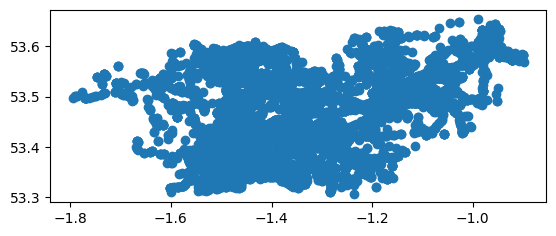

In [47]:
geo_data.plot()

In [48]:
geo_data.to_csv('cleaned_dft_statistics_collision_and_casualty_last_5_years.csv', index=False)